# Projeto 12: Remoção de ruído de imagens

# Etapa 1: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

# Etapa 2: Carregamento da base de dados

In [2]:
from tensorflow.keras.datasets import fashion_mnist #Get a data example from the Tensorflow library

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() #Load and storage the data

4422102/4422102 [==============================] - 0s 0us/step


# Etapa 3: Visualização dos dados

In [4]:
X_train.shape #60000 registers

(60000, 28, 28)

In [5]:
X_test.shape #10000 registers

(10000, 28, 28)

In [6]:
i = random.randint(0,60000) #Generate a random image
plt.imshow( X_train[i] , cmap = 'gray')

In [7]:
label = y_train[i]
label

1

In [8]:
W_grid = 15#width
L_grid = 15#length

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)

#Show 225 examples
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

# Etapa 4: Adição de ruído nas imagens

In [37]:
#Normalize the data. Put it in 0 to 1 format
X_train = X_train / 255
X_test = X_test / 255

In [38]:
#Example of noise alune(without image)
added_noise = np.random.randn(*(28,28))

In [39]:
added_noise.shape

(28, 28)

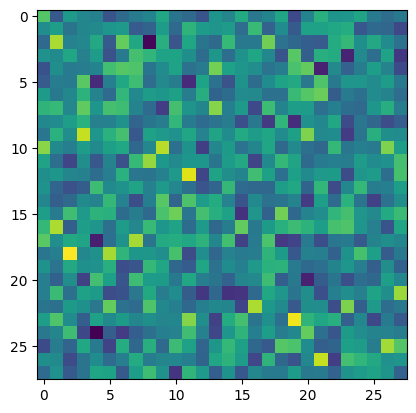

In [40]:
plt.imshow(added_noise);

In [ ]:
#Decrease the size of the noise
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))

In [ ]:
plt.imshow(added_noise);

In [41]:
#Loading the image and apply noise
noise_factor = 0.2
sample_image = X_train[10]
noisy_sample_image = sample_image + noise_factor * np.random.randn(*(28,28))

In [42]:
plt.imshow(noisy_sample_image, cmap='gray');

In [43]:
noisy_sample_image.max()

1.2610648277313357

In [44]:
noisy_sample_image.min()

-0.5781306639218381

In [45]:
#Apply more noise
noisy_sample_image = np.clip(noisy_sample_image, 0., 1.)
#It get the image and inform that the min() pixel = 0 and the max() = 1

In [46]:
noisy_sample_image.max()

1.0

In [47]:
noisy_sample_image.min()

0.0

In [48]:
plt.imshow(noisy_sample_image, cmap='gray');

In [49]:
X_train_noisy = []#Noisy data
noise_factor = 0.2

for sample_image in X_train:#For each image in the train variable
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))#Apply noise
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)#Aplly noise
  X_train_noisy.append(sample_image_noisy)#Add to the array

In [50]:
type(X_train_noisy)

list

In [51]:
X_train_noisy = np.array(X_train_noisy)#Convert to numpy array
type(X_train_noisy)

numpy.ndarray

In [52]:
X_train_noisy.shape #60000 registers

(60000, 28, 28)

In [55]:
plt.imshow(X_train_noisy[50], cmap='gray');

In [61]:
X_test_noisy = []#Noisy data
noise_factor = 0.4

for sample_image in X_test:#For each image in the test data
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))#Apply noise
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)#Apply noise
  X_test_noisy.append(sample_image_noisy)

In [62]:
X_test_noisy = np.array(X_test_noisy)#Convert to numpy array
type(X_test_noisy)

numpy.ndarray

In [63]:
plt.imshow(X_test_noisy[50], cmap='gray');

# Etapa 5: Criação e treinamento do modelo

In [57]:
autoencoder = tf.keras.models.Sequential()#Create a sequential neural network

# Encoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding='same', input_shape=(28,28,1)))#Add a convolutional layer
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))#Add a max pooling

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))#Add a convolutional layer
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))#Add a max pooling

# Encoded image
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding='same'))#Add a convolutional layer -> Here is the medium layer(where the image is encoded)

#Decoder
autoencoder.add(tf.keras.layers.UpSampling2D((2,2))) #Go back what the MaxPooling2D layer did
autoencoder.add(tf.keras.layers.Conv2DTranspose(8, (3,3), strides=1, padding='same')) #Go back what the Conv2D layer did

autoencoder.add(tf.keras.layers.UpSampling2D((2,2)))#Go back what the MaxPooling2D layer did
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, padding='same', activation='sigmoid')) #Go back what the Conv2D layer did

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 8)           584       
                                                                 
 up_sampling2d_2 (UpSamplin  (None, 14, 14, 8)        

In [58]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001)) #Compile the neural network

In [59]:
#Train the neural network
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),#noisy image
                X_train.reshape(-1, 28, 28, 1),#Image without noise
                epochs = 10,
                batch_size = 200)
# Basically, the neural network try fix the noisy image putting out the noise in every attempt and compares with the image without noise
# Using the backpropagation and the other correction functions, if the neural network commits a mistake, it corrects its weights

Epoch 1/10
300/300 [==============================] - 46s 149ms/step - loss: 0.3625
Epoch 2/10
300/300 [==============================] - 46s 154ms/step - loss: 0.3093
Epoch 3/10
300/300 [==============================] - 46s 152ms/step - loss: 0.3039
Epoch 4/10
300/300 [==============================] - 47s 156ms/step - loss: 0.3015
Epoch 5/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2998
Epoch 6/10
300/300 [==============================] - 45s 149ms/step - loss: 0.2985
Epoch 7/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2974
Epoch 8/10
300/300 [==============================] - 49s 162ms/step - loss: 0.2964
Epoch 9/10
300/300 [==============================] - 45s 148ms/step - loss: 0.2956
Epoch 10/10
300/300 [==============================] - 44s 148ms/step - loss: 0.2949


# Etapa 6: Avaliação do modelo

In [64]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1,28,28,1))# Try correct some images

1/1 [==============================] - 0s 153ms/step


In [65]:
denoised_images.shape#Show the shape (imagesAmount, width, size, channel)

(15, 28, 28, 1)

In [66]:
#Compare the data with and without the noise
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
  for img, ax in zip(images, row):
    ax.imshow(img.reshape((28,28)), cmap='gray')

# Etapa 7: Confirmação das dimensões

Notas:


*   Se stride = 1 e padding = same, as dimensões da saída serão iguais as dimensões da entrada. Exemplo:
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
* Se stride = 2 e padding = same, as dimensões da saída serão menores (metade)
> autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same", input_shape=(28, 28, 1)))

* Padding = 'same' indica que preservaremos as dimensões de entrada
* Padding = 'valid' indica que perderemos um pouco de informação (não será adiciona preenchimento ao redor da imagem)

Artigo: https://www.corvil.com/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow



In [ ]:
# W = 28, F = 3, S = 1, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/1 + 1 = 28
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same",
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# W = 28, F = 3, S = 2, Padding = same (P=F-1/2=1)
# o = (W-F+2*P/S) +1 = (28-3+2*1)/2 + 1 = 14
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="same",
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 14, 14, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Quando padding = valid, não são adicionadas "bordas" para preencher a imagem
# W = 28, F = 3, S = 1, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/1 + 1 = 26
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="valid",
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Quando padding = valid, não são adicionadas "bordas" para preencher a imagem
# W = 28, F = 3, S = 2, Padding = valid (P=0)
# o = (W-F+2*P/S) +1 = (28-3+0)/2 + 1 = 13
autoencoder = tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=2, padding="valid",
                                       input_shape=(28, 28, 1)))
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 13, 13, 16)        160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________
